In [2]:
# WIDS PROJECT UID 41 Stock Price Prediction with LSTM Networks Final Report by 22B2528 Pawar Aryan Anil

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

## 1. Introduction
# Stock price prediction is a challenging problem due to the inherent volatility of financial markets. 
# In this project, we use Long Short-Term Memory (LSTM) networks, a type of recurrent neural network (RNN), to predict stock prices based on historical data.

In [3]:
## 2. Methodology

### 2.1 Data Collection
#We use Yahoo Finance to fetch historical stock price data for Apple Inc. (AAPL) from January 1, 2020, to December 31, 2023. The dataset includes Open, High, Low, Close, and Volume attributes, with a primary focus on the Closing Price.

def load_stock_data(stock_symbol, start_date, end_date):
    data = yf.download(stock_symbol, start=start_date, end=end_date)
    return data

stock_symbol = "AAPL"
start_date = "2020-01-01"
end_date = "2023-12-31"
data = load_stock_data(stock_symbol, start_date, end_date)

[*********************100%%**********************]  1 of 1 completed


c:\Users\aryan\anaconda3\lib\site-packages\yfinance\utils.py:782: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2020-01-02  74.059998  75.150002  73.797501  75.087502  72.716064  135480400
2020-01-03  74.287498  75.144997  74.125000  74.357498  72.009117  146322800
2020-01-06  73.447502  74.989998  73.187500  74.949997  72.582924  118387200
2020-01-07  74.959999  75.224998  74.370003  74.597504  72.241547  108872000
2020-01-08  74.290001  76.110001  74.290001  75.797501  73.403625  132079200
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2020-01-02 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1006 non-null   float64
 1   High       1006 non-null   float64
 2   Low        1006 non-null   float64
 3   Close      1006 non-null   float64
 4   Adj Close  1006 non-null   float64
 5   Volume     1006 non-null   int64  
dtypes: float64(5

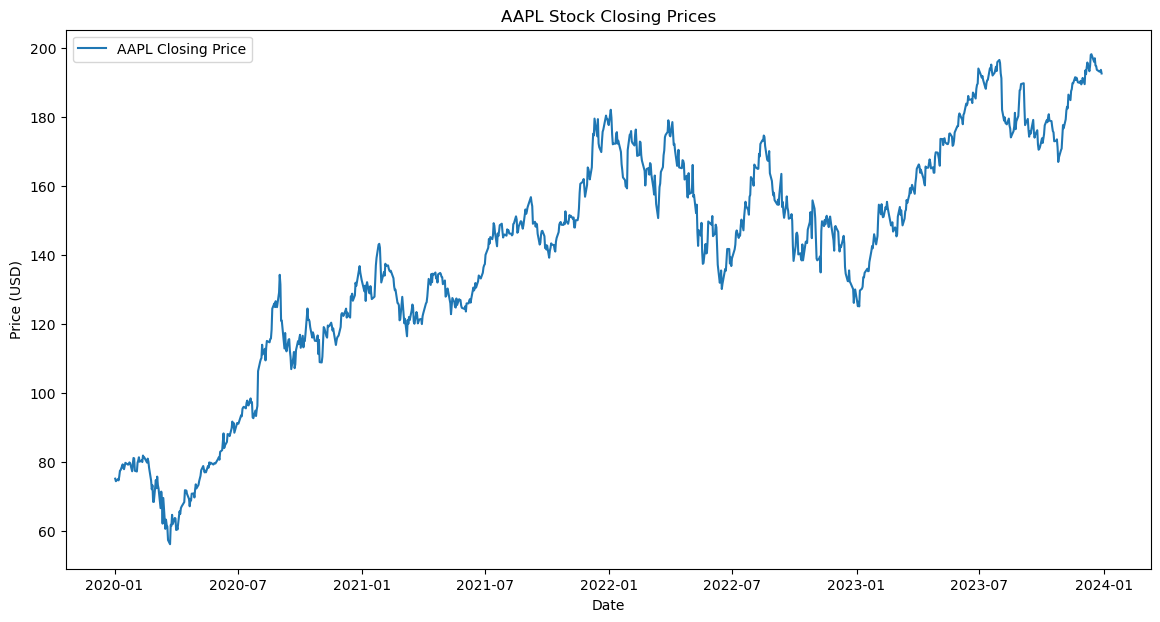

In [4]:
### 2.2 Exploratory Data Analysis (EDA)
print(data.head())
print(data.info())
print(data.describe())

plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label=f'{stock_symbol} Closing Price')
plt.title(f'{stock_symbol} Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

In [5]:
### 2.3 Data Preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data[['Close']])

def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        labels.append(data[i+seq_length])
    return np.array(sequences), np.array(labels)

seq_length = 60
X, y = create_sequences(data_scaled, seq_length)

split = int(0.8 * len(X))
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]


In [6]:
### 2.4 Model Architecture
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20


c:\Users\aryan\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.1576 - val_loss: 0.0400
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0099 - val_loss: 0.0187
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0077 - val_loss: 0.0055
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0055 - val_loss: 0.0021
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0046 - val_loss: 0.0051
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0055 - val_loss: 0.0018
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0056 - val_loss: 0.0013
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0042 - val_loss: 0.0035
Epoch 9/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0042 - val_loss: 0.0042
Epoch 10/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0046 - val_loss: 0.0019
Epoch 11/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0042 - val_loss: 0.0039
Epoch 12/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0039 - val_l

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


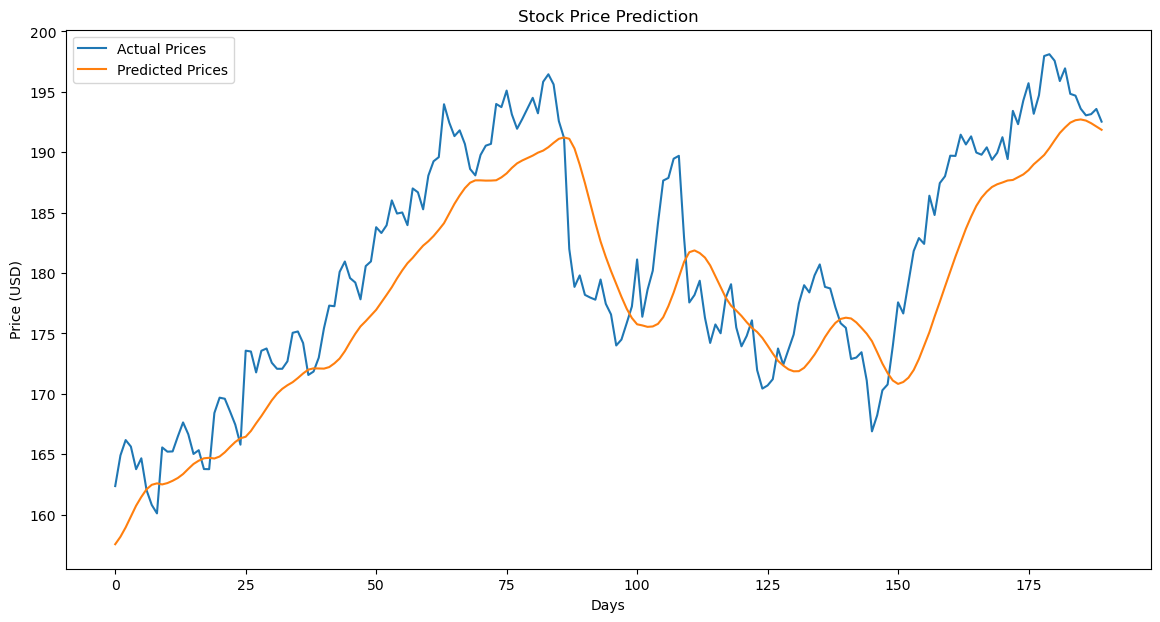

In [7]:
### 2.5 Model Evaluation
y_pred = model.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(14, 7))
plt.plot(y_test_rescaled, label='Actual Prices')
plt.plot(y_pred_rescaled, label='Predicted Prices')
plt.title('Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

In [8]:
## 3. Results and Analysis

### 3.1 Visualizations
# - The historical closing prices of AAPL were plotted to identify trends.
# - The predicted prices were plotted against actual stock prices, showing a reasonable fit.

### 3.2 Performance Metrics
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 4.4068050183747935
Mean Squared Error (MSE): 26.802302857330304
Root Mean Squared Error (RMSE): 5.177094055291086


## 3.3 Interpretation of Results
### - The model captured trends well but struggled with short-term fluctuations.
### - Performance could be improved by adding more features (e.g., technical indicators).
### - Increasing training data or using more advanced architectures like Transformer models could enhance prediction accuracy.

## 4. Challenges and Observations
### - The stock market is influenced by various external factors (e.g., news, economic indicators) not captured in historical price data.
### - The model's accuracy decreases when predicting stock price movements in highly volatile market conditions.
### - Hyperparameter tuning and experimenting with different sequence lengths could improve results.

## 5. Conclusion
### LSTM networks provide a viable method for stock price prediction but have limitations in handling extreme volatility. Future work can explore alternative deep learning models and additional data sources for improved accuracy.

## 6. References
### - Yahoo Finance API for data collection.
### - TensorFlow and Keras for LSTM model implementation.
### - Scikit-learn for data preprocessing and evaluation.
